> 자연어 처리에서 텍스트를 표현하는 방법은 여러가지가 존재.  
이번 챕터에서는 정보 검색과 텍스트 마이닝(텍스트에서 고품질 정보를 추출하는 프로세스) 분야에서 주로 사용되는   
카운트 기반의 텍스트 표현방법들을 알아봄.

- DTM(Document Term Matrix)
- TF-IDF(Term Frequency-Inverse Document Frequency)

<br>

위의 방식으로 수치화시 통계적인 접근 방법을 통해
- 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지,
- 문서의 핵심어가 무엇인지,
- 검색엔진에서 검색 결과의 순위 결정,
- 문서들 간의 유사도를 구하는 등의 용도로 사용할 수 있음


# 11-01 단어의 표현 방법

> 카운트 기반의 단어 표현 방법 외에도 다양한 단어의 표현 방법에는 어떤 것이 있을까?
- 해당 책에서는 어떤 순서로 단어 표현 방법을 학습하게 될것인지 먼저 설명함

## 1. 단어의 표현 방법

단어 표현 방법은 크게 2가지로 나뉨
1. 국소 표현(Local Representation): 해당 단어 그 자체만 보고, 특정값을 맵핑하여 단어를 표현하는 방법
    - ex. '강아지', '귀여운', '사랑스러운'이라는 단어가 있을 때 각 단어에 1번, 2번, 3번과 같은 숫자를 맵핑하여 부여하는 경우가 해당됨
    - 이산 표현(Discrete Representation)이라고도 함.
2. 분산 표현(Distributed Representation): 주변을 참고하여 단어를 표현하는 방법
    - ex. '강아지'라는 단어 근처에는 주로 '귀여운', '사랑스러운'이라는 단어가 자주 등장하므로, '강아지'라는 단어는 '귀여운', '사랑스러운'느낌이다로 단어를 정의하는 경우가 해당됨.
    - 연속 표현(Continuous Representation)이라고도 함.
- 국소 표현 방법은 단어의 의미, 뉘앙스를 표현할 수 없지만, 분산 표현 방법은 단어의 뉘앙스를 표현할 수 있게 됨

>(p.404) 추가 의견으로 구글의 연구원 토마스 미코로브(Tomas Mikolov)는 2016년에 한 발표에서 잠재 의미 분석(LSA)이나 잠재 디리클레 할당(LDA)과 같은 방법들은 단어의 의미를 표현할 수 있다는 점에서 연속 표현(Continuous Represnetation)이지만, 엄밀히 말해서 다른 접근의 방법론을 사용하고 있는 워드투벡터(Word2vec)와 같은 분산 표현(Distributed Representation)은 아닌 것으로 분류하여 **연속 표현이 분산 표현을 포괄하고 있는 더 큰 개념으로 설명**하기도 했습니다.


## 2. 단어 표현의 카테고리화

> 이 책에서는 아래와 같은 기준으로 단어표현을 카테고리화하여 작성됨

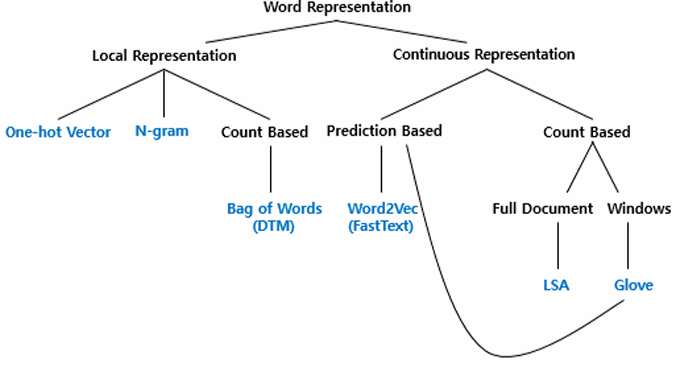

- Bag of Words는 국소표현에 속하며, 단어의 빈도수를 카운트(Count)하여 단어를 수치화하는 단어 표현 방법
    - 이번 챕터에서 BoW와 그의 확장인 DTM(또는 TDM)에 대해 학습하고,
    - 빈도수 기반 단어 표현에 단어의 중요도에 따른 가중치를 줄 수 있는 TF-IDF에 대해서 학습함.

- 워드 임베딩 챕터에서는 연속 표현에 속하면서,
    - 예측을 기반으로 단어의 뉘앙스를 표현하는 Word2Vec(워드투벡터)와
    - 그의 확장인 FastText(패스트텍스트)를 학습하고,
    - 예측과 카운트라는 두 가지 방법이 모두 사용된 글로브(GloVe)에 대해 학습함.

# 11-02 백 오브 워즈(Bag of Words) 방법

> Bag of Words는 단어의 등장 순서를 고려하지 않는 빈도수 기반의 단어 표현방법이다.

## 1. Bag of Words 란?

Bag of Words: 단어들의 순서는 전혀 고려하지 않고, **단어들의 출현 빈도(frequency)에만 집중**하는 텍스트 데이터의 수치화 표현 방법
- 직역시 단어들의 가방이라는 듯. 갖고 있는 어떤 텍스트 문서에 있는 단어들을 가방에다가 전부 넣고, 가방을 흔들어 단어들을 섞는 상황을 상상해보면 됨.
- 만약, 해당 문서 내에서 특정 단어가 N번 등장했다면, 이 가방에는 그 특정 단어가 N개 있게됨.
- 가방을 흔들어서 단어를 섞었기 때문에 더이상 단어의 순서는 중요하지 않다.

BoW를 만드는 과정을 아래 2가지로 생각 가능
```python
1) 각 단어에 고유한 정수 인덱스를 부여함 # 단어집합 생성
2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듦
```

***Example***

> 문서1 : 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.

문서 1에 대해서 BoW를 만들어보자.


In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 35.6 MB/s eta 0:00:00


- `array.insert(i, x)`: array의 원하는 위치 i에 x를 추가한다.

In [ ]:
from konlpy.tag import Okt
okt = Okt()

def build_bag_of_words(document):
    # 온점 제거 및 형태소 분석
    document = document.replace('.','')
    tokenized_document = okt.morphs(document)

    word_to_index = {}
    bow = []

    for word in tokenized_document:
        if word not in word_to_index.keys():
            word_to_index[word] = len(word_to_index)    # 딕셔너리 키의 수를 반환함. 즉, 정수 인덱스를 부여하는 과정
            # BoW에 전부 기본값 1을 넣는다.
            bow.insert(len(word_to_index)-1, 1)
        else:
            # 재등장하는 단어의 인덱스
            index = word_to_index.get(word)
            # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
            bow[index] = bow[index]+1

    return word_to_index, bow

In [ ]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary: ', vocab)    # 문서 1의 각 단어에 대해서 인덱스를 부여한 결과
print('bag of words vector : ', bow)    # 문서 1의 bow

vocabulary:  {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector :  [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


'물가상승률'(index=4)이라는 단어가 2번 등장하였으므로, bow의 index=4에서 값이 2인 것을 확인 가능

## 2. Bag of Words의 다른 예제들

> 문서2 : 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.

In [ ]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary: ', vocab)
print('bag of words vector: ', bow)

vocabulary:  {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector:  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


> 문서3(문서1+문서2): 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.

In [ ]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary: ', vocab)
print('bag of words vector : ', bow)

vocabulary:  {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector :  [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


BoW는 종종 여러 문서의 단어 집합을 합친 뒤에, 해당 단어 집합에 대한 각 문서의 BoW를 구하기도 함.
- 문서3에 대한 단어집합을 기준으로 문서 1, 문서2의 BoW를 만든다면 아래와 같음

```
문서3 단어 집합에 대한 문서1 BoW : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]  
문서3 단어 집합에 대한 문서2 BoW : [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1]  
```

물가상승률이라는 단어가 문서 1에서는 2회, 문서 2에서는 1회 등장하였으므로, 두 BoW의 index 4의 값은 각각 2와 1이 됨

BoW는 주로 어떤 단어가 얼마나 등장했는지를 기준으로, 해당 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰임
- 달리기, 체력, 근력이라는 단어가 자주 등장 -> 체육 관련 문서로 분류
- 미분, 방정식, 부등식이라는 단어가 자주 등장 -> 수학 관련 문서로 분류

## 3. CountVectorizer 클래스로 BoW 만들기

사이킷런에서는 단어의 빈도를 count하여 Vector로 만드는 CountVectorizer 클래스르 지원함

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스부터 각 단어의 빈도수를 기록
print('bag of words vector : ', vector.fit_transform(corpus).toarray()) # fit_transform의 인자는 리스트여야함

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary: ', vector.vocabulary_)

bag of words vector :  [[1 1 2 1 2 1]]
vocabulary:  {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


- 알파벳 I가 BoW를 만드는 과정에서 사라졌는데, CountVectorizer가 기본적으로 길이가 2 이상인 문자에 대해서만 토큰으로 인식하기 때문.

***주의!!***

CountVectorizer는 단지 **띄어쓰기만을 기준으로 단어를 자르는** 낮은 수준의 토큰화를 진행하고 BoW를 만듦
- 영어와 달리 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음.
- ex. '물가상승률과'와 '물가상승률은'으로 조사를 포함해서 하나의 단어로 판단하기 때문에, '물가상승률'이라는 단어를 인식하지 못함
- 따라서, **영어 BoW를 만들때만 CountVectorizer를 사용.**

## 4. 불용어를 제거한 BoW만들기

불용어: 자연어 처리에서 별로 의미를 갖지 않는 단어들
```
BoW를 사용한다 == 각 문서에서 각 단어가 얼마나 자주 등장했는지를 보겠다
== 각 단어에 대한 빈도수를 수치화하겠다 == 텍스트 내에서 어떤 단어들이 중요한지를 보겠다
```

즉, BoW를 만들때 불용어를 제거하는 일은 자연어처리의 정확도를 높이기 위해서 선택할 수 있는 전처리 기법.
- CountVectorizer는 불용어를 지정하면 불용어는 제외하고 BoW를 만들수 있도록 불용어 제거기능을 지원함

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

### 1) 사용자가 직접 정의한 불용어 사용

In [ ]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector : ',vect.fit_transform(text).toarray())
print('vocabulary: ', vect.vocabulary_)

bag of words vector :  [[1 1 1 1 1]]
vocabulary:  {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### 2) CountVectorizer에서 제공하는 자체 불용어 사용

In [ ]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector : ',vect.fit_transform(text).toarray())
print('vocabulary: ', vect.vocabulary_)

bag of words vector :  [[1 1 1]]
vocabulary:  {'family': 0, 'important': 1, 'thing': 2}


### 3) NLTK에서 지원하는 불용어 사용

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector : ', vect.fit_transform(text).toarray())
print('vocabulary: ', vect.vocabulary_)

bag of words vector :  [[1 1 1 1]]
vocabulary:  {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# 11-03 DTM과 TF-IDF 행렬

문서 단어 행렬(Document-Term Matrix, DTM) 표현 방법: 서로 다른 문서들의 BoW를 결합한 표현 방법
- 일반적으로 **DTM**이라고 함.
    - 행과 열을 반대로 선택하면 TDM이라고도 함
- DTM을 이용하면 서로 다른 문서들을 비교할 수 있음.


## 1. 문서 단어 행렬(Document-Term Matrix, DTM)의 표기법

문서 단어 행렬(Document-Term Matrix, DTM): 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것
- 쉽게말해, **각 문서에 대한 BoW를 하나의 행렬로 만든 것**.
- 즉, BoW와 다른 표현 방법이 아니라 BoW 표현을 다수의 문서에 대해서 행렬로 표현하여 부르는 용어

***Example***
```
문서1 : 먹고 싶은 사과
문서2 : 먹고 싶은 바나나
문서3 : 길고 노란 바나나 바나나
문서4 : 저는 과일이 좋아요
```

위의 문서들에 띄어쓰기 단위 토큰화를 수행한다고 가정하고, DTM으로 표현하면 다음과 같음

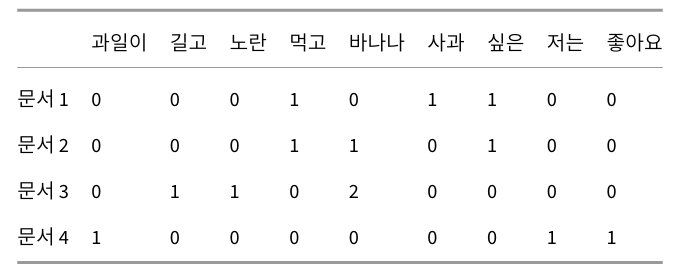

위처럼 각 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기함.

문서 단어 행렬은 **문서를 비교할 수 있도록 수치화 할 수 있다**는 점에서 의의를 가짐

## 2. 문서 단어 행렬(Document-Term matrix)의 한계

### 1) 희소 표현(Sparse representation)

원-핫 벡터: 단어 집합의 크기가 벡터의 차원이 되고, 대부분의 값이 0이되는 벡터
- 공간적 낭비와 계산 리소스를 증가시킬 수 있다는 단점을 가짐

DTM에서의 각 행을 문서 벡터라고 하면, 각 문서벡터의 차원은 원-핫 벡터와 마찬가지로 전체 단어 집합의 크기를 가짐.
- 즉, 문서 벡터의 차원이 엄청나게 커질 수 있으며, 많은 문서 벡터의 대부분의 값이 0일 수 있음.

원-핫 벡터나 DTM같이 **대부분의 값이 0인 표현**을 **희소 벡터**(Sparse vector)또는 **희소 행렬**(Sparse matrix)라고 함.
- 희소벡터는 많은 양의 저장 공간과 높은 계산 복잡도를 요구함
- 이때문에, 전처리를 통해 단어집합의 크기를 줄이는 일이 BoW 표현을 사용하는 모델에서 중요함.


### 2) 단순 빈도 수 기반 접근

> 여러 문서에 등장하는 모든 단어에 대해서 빈도 표기를 하는 이런 방법은 때로는 한계를 가지기도 합니다. 예를 들어 영어에 대해서 DTM을 만들었을 때, 불용어인 the는 어떤 문서이든 자주 등장할 수 밖에 없습니다. 그런데 유사한 문서인지 비교하고 싶은 문서1, 문서2, 문서3에서 동일하게 the가 빈도수가 높다고 해서 이 문서들이 유사한 문서라고 판단해서는 안 됩니다.

각 문서에는 중요한 단어와 불필요한 단어들이 혼재되어 있음.
- **DTM에 불용어와 중요한 단어에 대해서 가중치를 줄 수
 있는 방법**은 없을까?
- 이러한 아이디어를 적용한게 TF-IDF

TF-IDF 가중치를 사용하면 DTM 내에 있는 각 단어에 대한 중요도를 계산할 수있음
- **기존의 DTM을 사용하는 것보다 많은 정보를 고려하여 문서를 비교**할 수 있으며, 많은 경우에 DTM보다 더 좋은 성능을 얻을 수 있음

## 3. TF-IDF(단어 빈도-역 문서 빈도,Term Frequency-Inverse Document Frequency)

TF-IDF(Term Frequency-Inverse Document Frequency): **단어의 빈도**와 **역 문서 빈도**(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법.
1. DTM을 만든 후
2. TF-IDF 가중치를 부여함

TF-IDF는 **TF와 IDF를 곱한 값**을 의미함.


- 문서: $d$
- 단어: $t$
- 문서의 총 개수: $n$

용어를 위와 같이 정의하면, TF, DF, IDF는 아래와 같이 정의됨.

### 1) tf(d,t): 특정 문서 d에서의 특정 단어 t의 등장 횟수
즉, **TF는 DTM에서 각 단어들이 가진 값.**
- DTM이 각 문서에서의 각 단어의 등장 빈도를 나타내는 값이었기 때문

### 2) df(t): 특정 단어 t가 등장한 문서의 수

오직 **특정 단어 t가 등장한 문서의 수에만 집중**함.
- 특정 단어가 각 문서, 또는 문서들에서 몇번 등장했는지에는 관심을 가지지 않음.
- 앞서 배운 DTM에서 '바나나'는 문서 2와 문서 3에서 등장했으니 df=2
    - '바나나'란 단어가 문서 2에서 100번 등장했고, 문서 3에서 200번 등장했다고 하더라도 '바나나'의 df=2임

### 3) idf(t): df(t)에 반비례하는수
$$idf(t) = log(\frac{n}{1+df(t)})$$


**IDF는 DF의 역수를 취하고 싶은 것**
- 단, log를 사용하지 않았을 때, 총 문서의 수 n이 커질수록, IDF의 값이 기하급수적으로 커지는 것을 방지하기 위해 log를 사용함
- 1을 더해주는 첫번째 이유로는 특정단어가 전체 문서에서 등장하지 않을 경우에 분모가 1이 되는 것을 방지하기 위해 사용함.


***밑이 10인 log를 사용하는 경우***

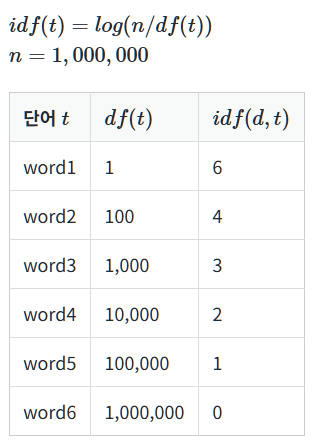

***log를 사용하지 않는 경우***

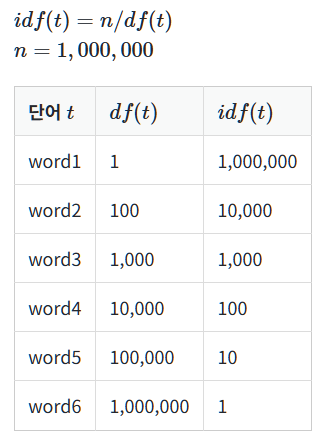

또한, 불용어 등과 같이 자주 쓰이는 단어들은 비교적 자주 쓰이지 않는 단어들보다 수십배 자주 등장함. 그런데, 비교적 자주 쓰이지 않는 단어들도 희귀 단어들에 비교하면수백배는 더 자주 등장함.
- 즉, log를 씌워주지 않으면 희귀 단어들에 엄청난 가중치가 부여될 수 있음(분모(특정 단어가 등장한 문서의 수)가 작을수록 커지므로)
    - 로그를 씌우면 이러한 격차를 줄이는 효과가 있음
    


TF-IDF는 **TF-IDF값이 낮으면 중요도가 낮고, TF-IDF값이 크면 중요도가 큰 것**

- 모든 문서에서 자주 등장하는 단어는 -> 중요도가 낮다고 판단
- 특정 문서에서만 자주 등장하는 단어는 -> 중요도가 높다고 판단
- 따라서 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해 낮아지게 됨


***Example***

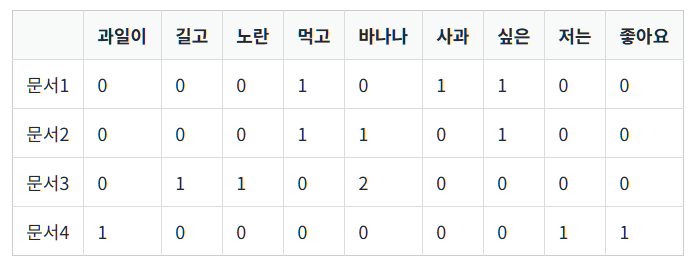

- TF: DTM을 그대로 사용하면 됨
- 로그는 자연로그를 이용할 것
    - 로그의 밑은 TF-IDF를 사용하는 사용자가 임의로 정할 수 있음.
        - 대부분의 경우에 TF-IDF의 로그는 자연로그(ln)
    - 기존의 값에 곱하여 값의 크기를 조절하는 상수의 역할을 함

**IDF**

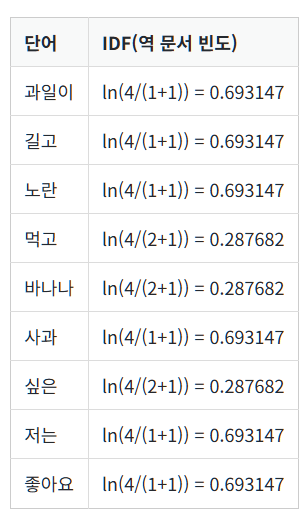

분자: 문서의 총 수

분모: 각 등장한 문서의 수(DF) + 1

문서 1개에만 등장한 단어와 문서 2개에만 등장한 단어는 값의 차이를 보임.
- IDF는 여러 문서에서 등장한 단어의 가중치를 낮추는 역할을 함

**TF-IDF**

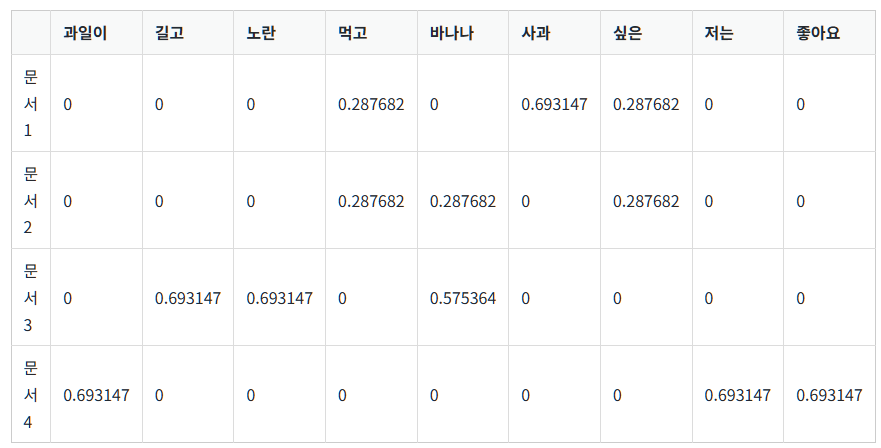

TF는 DTM에서의 각 단어의 값과 같으므로, 앞서 사용한 DTM에서 단어별로 IDF값을 곱해주면 됨
- TF-IDF는 특정 문서에서 자주 등장하는 단어는 그 문서내에서 중요한 단어로 판단하기 때문에 문서 2(1번 등장)보다 문서 3에서의 바나나(2번 등장)를 더욱 중요한 단어라고 판단

## 4. 파이썬으로 TF-IDF 직접 구현하기

In [ ]:
import pandas as pd # 데이터 프레임 사용을 위해
from math import log # IDF 계산을 위해

# 앞의 예제에서 사용된 4개의 문서를 저장
docs = [
    '먹고 싶은 사과',
    '먹고 싶은 바나나',
    '길고 노란 바나나 바나나',
    '저는 과일이 좋아요'
]

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
# TF, IDF, TF-IDF를 구하는 함수 구현
# 총 문서의 수
N = len(docs)

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc  # 참이면 bool값(1)을 더함
    return log(N/(df+1))

def tfidf(t,d):
    return tf(t,d)*idf(t)

In [ ]:
# TF를 구하기 = DTM을구하기
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d)) # 리스트 '안'의 마지막 리스트에 삽입

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
# 각 단어에 대한 IDF값 구하기
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [ ]:
# TF-IDF 행렬 출력
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


실제로 TF-IDF 구현을 제공하는 많은 머신러닝 패키지들은 위에서 배운 식과는 다른 **조정된 식을 사용**함.
- 위의 기본적인 식을 바탕으로 한 구현에는 몇가지 문제점이 존재하기 때문.
- ex. 전체 문서의 수 n이 4일때, df(t)의 값이 3인 경우에는 log 항의 분자와 분모의 값이 같아짐.
    - 즉, log의 진수값이 1이 되면서 idf(d,t)=0이 됨
    - idf(d,t) = log(n/(df(t)+1))=0
    - IDF의 값이 0이라면, 더이상 가중치의 역할을 수행하지 못함

## 5. 사이킷런을 이용한 DTM과 TF-IDF 실습

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # CountVectorizer를 사용하면 DTM을 만들 수 있음

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do',
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


사이킷런에서는 TF-IDF를 자동 계산해주는 `TfidfVectorizer`를 제공함.
- IDF의 log의 분자에 1을 더해주고, log항에 1을 더해준 뒤(log+1),
$$idf(t) = log{\frac{1+n}{1+df(t)}}+1$$
-  TF-IDF에 L2 정규화로 값을 조정하는 등의 차이가 존재함.
- TF-IDF가 가진 의도는 여전히 그대로 가지고 있음

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do',
]


tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


# 11-04 코사인 유사도를 이용한 추천 시스템

> 단어를 수치화할 수 있는 방법을 이해했다면, 이러한 표현 방법에 대해서 **코사인 유사도**를 이용하여 문서의 유사도를 구하는게 가능함.

## 1. 코사인 유사도(Cosine Similarity)

코사인 유사도: 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도
- 벡터의 방향이 완전히 동일한경우: 1
- 90도의 각을 이루면: 0
- 180도로 반대의 방향을 가지면: -1
- 즉, 코사인 유사도는 -1이상 1이하의 값을 가지며, 값이 1에 가까울수록 유사도가 높다고 판단.

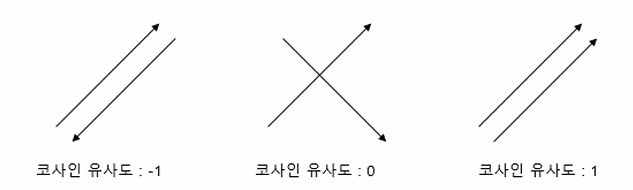

***수식***

두 벡터 A, B에 대해 코사인 유사도는 아래의 식으로 나타남.

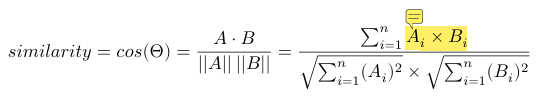

$A \cdot B$: element-wise로 곱함(점곱)

문서 단어 행렬이나 TF-IDF 행렬로 문서의 유사도를 구하는 경우, 문서 단어 행렬이나 TF_IDF 행렬이 각각 특징(feature) 벡터 A, B가 됨

***Example***

```
문서1 : 저는 사과 좋아요
문서2 : 저는 바나나 좋아요
문서3 : 저는 바나나 좋아요 저는 바나나 좋아요
```
띄어쓰기 기준 토큰화를 했다고 가정하고, 위의 세문서에 대해 문서 단어 행렬(DTM)을 만들면 아래와 같다.


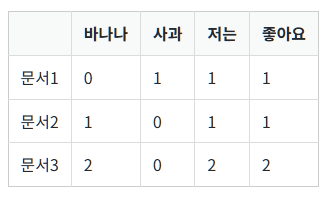

In [1]:
# Numpy를 이용한 코사인 유사도를 계산하는 함수
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A,B):
    return dot(A,B)/(norm(A)*norm(B))

doc1 = np.array([0, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0, 2, 2])

print('문서 1과 문서 2의 유사도: ',cos_sim(doc1, doc2))
print('문서 1과 문서 3의 유사도: ',cos_sim(doc1, doc3))
print('문서 2과 문서 3의 유사도: ',cos_sim(doc2, doc3))

문서 1과 문서 2의 유사도:  0.6666666666666667
문서 1과 문서 3의 유사도:  0.6666666666666667
문서 2과 문서 3의 유사도:  1.0000000000000002


**눈여겨볼점**
- '문서 1과 문서 2의 코사인 유사도'와 '문서 1과 문서 3의 코사인 유사도'가 같다.
- '문서 2와 문서 3의 코사인 유사도'의 값이 1이 나온다.
    - 코사인 유사도가 1인 경우는
        - 벡터의 방향이 완전히 동일한 경우 값이 1이 나오며,
        - 코사인 유사도 관점에서는 유사도의 값이 최대임을 의미한다.
    - 문서 3은 단지 문서 2에서 모든 단어의 빈도수가 1씩 증가했을 뿐이다.
        - 이처럼 **한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이다.**

***코사인 유사도가 해결책이 될 수 있는 상황***
> 바로 위의 강조된 텍스트가 시사하는 점은 무엇일까요? 예를 들어보겠습니다.  
문서 A와 B가 동일한 주제의 문서. 문서 C는 다른 주제의 문서라고 해봅시다.  
그리고 문서 A와 문서 C의 문서의 길이는 거의 차이가 나지 않지만, 문서 B의 경우 문서 A의 길이보다 두 배의 길이를 가진다고 가정하겠습니다.  
이런 경우 **유클리드 거리로 유사도를 연산하면 문서 A가 문서 B보다 문서 C와 유사도가 더 높게 나오는 상황이 발생**할 수 있습니다.
- 이는 유사도 연산에 문서의 길이가 영향을 받았기 때문인데, 이런 경우 코사인 유사도가 해결책이 될 수 있습니다.
- 코사인 유사도는 유사도를 구할 때 벡터의 방향(패턴)에 초점을 두므로 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있도록 도와줍니다.

## 2. 유사도를 이용한 추천 시스템 구현하기

TF-IDF와 코사인 유사도만으로 영화의 줄거리에 기반해서 영화를 추천하는 추천시스템을 만들어보자.
- TF-IDF를 사용한다는 말은, DTM에 가중치를 적용시킨다는 말이다.

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [3]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

In [4]:
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:', data['overview'].isnull().sum())

overview 열의 결측값의 수: 135


In [5]:
# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

In [7]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape):', tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape): (20000, 47487)


47,847차원의 문서 벡터가 2만개 존재하는 것을 확인 가능

In [8]:
# 2만개 문서 벡터에 대해서 상호간의 코사인 유사도를 구함
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :', cosine_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


코사인 유사도로 나온 연산 결과: 20,000개의 문서 벡터(영화 줄거리 벡터)와 자기 자신을 포함한 20,000개의 문서벡터 간의 유사도가 기록된 행렬
- 즉, 모든 20,000개 영화의 상호 유사도가 기록되어져 있음
- 각 행이 개별 문서벡터를 뜻하고, 열에는 다른 문서벡터와의 코사인 유사도 값이 기록되어져있음

In [10]:
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


In [16]:
# 선택한 영화의 제목을 입력하면, 가장 overview가 유사한 10개의 영화를 찾아내는 함수
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))   #(영화 인덱스, 유사도 점수)를 쌍으로 리스트를 반환

    # 유사도에 따라 영화들을 정렬함
    # sorted()함수: 리스트의 각 원소(튜플)를 하나씩 꺼내 key함수에 넘긴다. 기본적으로 오름차순 정렬
        # lambda x: x는 sorted()가 꺼낸 리스트의 한 원소
        # x[1]: x의 원소의 2번째값. 즉 유사도기준으로 sort해라
        # reverse=True 내림차순으로 sort

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]    # 인덱스로 탐색하고, 해당 data의 title을 가져옴

In [17]:
get_recommendations('The Dark Knight Rises')

,title
12481,The Dark Knight
150,Batman Forever
1328,Batman Returns
15511,Batman: Under the Red Hood
585,Batman
9230,Batman Beyond: Return of the Joker
18035,Batman: Year One
19792,"Batman: The Dark Knight Returns, Part 1"
3095,Batman: Mask of the Phantasm
10122,Batman Begins


다크나이트가 첫번째고, 그 외에도 전부 배트맨 영화를 찾아낸 것을 확인 가능

# 11-05 단어와 문서의 유사도를 구하는 다양한 방법

> 문서의 유사도를 구하기 위한 방법으로는 코사인 유사도 외에도 여러가지 방법들이 존재

## 1. 유클리드 거리(Euclidean distance)

유클리드 거리는 문서의 유사도를 구할 때 자카드 유사도나 코사인 유사도 만큼 유용한 방법은 아님
- 여러 방법을 이해하고 시도해보는 것 자체만으로도 다른 개념의 이해에 도움이 되므로 의미가 있음


***2차원 공간을 가정할 경우***

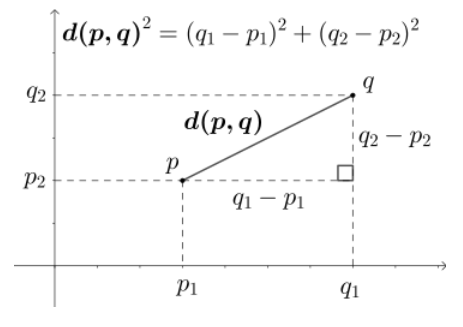

2차원 좌표평면 상에서 유클리드 거리는 두 점 p, q 사이의 직선 거리를 구하는 문제

여러 문서에 대해 유사도를 구하고자 유클리드 거리 공식을 이용하는 것은,  

이 2차원을 -> **단어의 총 개수만큼의 차원으로 확장**하는 것과 같음

***공식***

**다차원 공간** 상에서 두개의 점 p와 q가 아래의 좌표를 가진다고 하자.

$p = (p_1,p_2, ..., p_n)$

$q = (q_1,q_2,...,q_n)$

이 때 두 점 사이의 거리를 계산하는 유클리드 거리 공식은 다음과 같다.

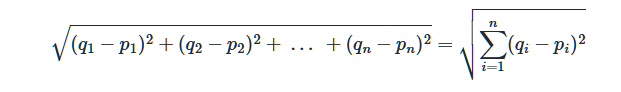

***Example***

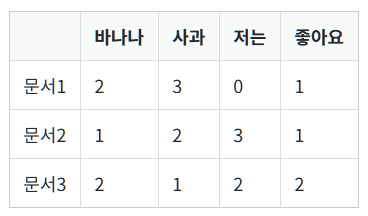

위와 같은 DTM이 있다고 하자.
- 단어의 개수가 4개이므로 -> 4차원 공간에 문서1, 문서2, 문서 3을 배치하는 것과 같음
- 벡터의 차원 = 원소의 개수

아래의 문서 Q에 대해 문서 1, 문서 2, 문서 3중 가장 유사한 문서를 찾아내려고 한다고 하자.
- 문서 Q또한 다른 문서들처럼 4차원 공간에 배치시켰다는 관점에서, 4차원 공간에서의 각각의 문서들과의 유클리드 거리를 구하면 된다.

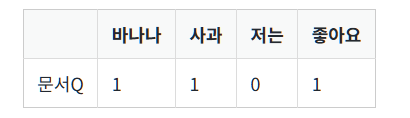

In [18]:
import numpy as np

def dist(x, y):
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서 1과 문서 Q의 거리', dist(doc1, docQ))
print('문서 2와 문서 Q의 거리', dist(doc2, docQ))
print('문서 3과 문서 Q의 거리', dist(doc3, docQ))

문서 1과 문서 Q의 거리 2.23606797749979
문서 2와 문서 Q의 거리 3.1622776601683795
문서 3과 문서 Q의 거리 2.449489742783178


유클리드 거리의 값이 가장 작다 = **문서 간 거리가 가장 가깝다는 것**을 의미.
- 즉, 문서 1이 문서 Q와 가장 유사함

## 2. 자카드 유사도(Jaccard similarity)

자카드 유사도(Jaccard similarity)의 아이디어: A와 B 두개의 집합이 있다고 할 때, **합집합에서 교집합의 비율을 구한다면 두 집합 A와 B의 유사도를 구할 수 있다.**
- 교집합: 두개의 집합에서 공통으로 가지고 있는 원소들의 집합
- 자카드 유사도는 0과 1사이의 값을 가짐
- 만약 두 집합이 동일하다면 -> 1의 값
- 두 집합의 공통원소가 없다면 -> 0의 값

***자카드 유사도 함수 공식***

자카드 유사도를 구하는 함수를 J라 하면, J는 아래와 같다.

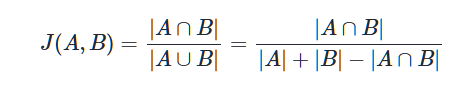

두개의 비교할 문서를 doc1, doc2라고 하였을 때, doc1과 doc2의 유사도를 구하기 위한 자카드 유사도는 아래와 같다.

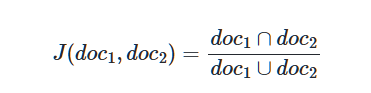

즉, 두 집합의 **교집합 크기**를 두 집합의 **합집합 크기로 나눈 값**으로 정의된다.
- 즉, nlp에서 크기 = 해당하는 단어의 개수

In [19]:
doc1 = "apple banana everyon like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 : ', tokenized_doc1)
print('문서2 : ', tokenized_doc2)

문서1 :  ['apple', 'banana', 'everyon', 'like', 'likey', 'watch', 'card', 'holder']
문서2 :  ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [20]:
union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서 1과 문서 2의 합집합', union)

문서 1과 문서 2의 합집합 {'apple', 'likey', 'watch', 'banana', 'card', 'love', 'you', 'holder', 'coupon', 'everyon', 'like', 'passport'}


합집합의 단어개수는 총 12개이다.

In [23]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서 1과 문서 2의 교집합',intersection)

문서 1과 문서 2의 교집합 {'apple', 'banana'}


교집합의 단어개수는 총 2개이다.

In [24]:
print('자카드 유사도 : ', len(intersection)/len(union))

자카드 유사도 :  0.16666666666666666


교집합의 크기(단어개수)를 합집합의 크기(단어개수)로 나누면 자카드 유사도(1/6)이 계산되는 것을 확인할 수 있다.